[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/repos-especializacion-UdeA/estadistica/blob/main/trabajo2/trabajo2.ipynb)

In [97]:
# Bibliotecas necesarias
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import bartlett, shapiro
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from IPython.display import display

# Ejemplo pizzeria

### Enunciado del problems

Armand's Pizza Parlors es una cadena de restaurantes de comida italiana. Sus mejores ubicaciones son las que se encuentran cerca de los campus de las universidades. Los gerentes creen que las ventas trimestrales de estos restaurantes (que se denotan por $y$) están directamente relacionadas con el tamaño de la población estudiantil (que se denota $x$) es decir, en los restaurantes que están cerca de campus que tienen una población estudiantil grande se generan más ventas que en los restaurantes situados cerca de campus con una población estudiantil pequeña.

|Restaurante|Estudiantes (miles de $) |Ventas (miles de $)|
|---|---|---|
|1|2|58|
|2|6|105|
|3|8|88|
|4|8|118|
|5|12|117|
|6|16|137|
|7|20|157|
|8|20|169|
|9|22|149|
|10|26|202|



In [13]:
# Leer archivo csv

# https://realpython.com/how-to-use-numpy-arange/

data = {
          'restaurante': np.arange(1,11),
          'estudiantes_miles': [2,6,8,8,12,16,20,20,22,26],
          'ventas_trim_miles': [58,105,88,118,117,137,157,169,149,202]
        }

# Leer el archivo CSV
df = pd.DataFrame(data)
df.set_index('restaurante', inplace=True)

# Mostrar las primeras filas del DataFrame
df


,estudiantes_miles,ventas_trim_miles
restaurante,,
1,2,58
2,6,105
3,8,88
4,8,118
5,12,117
6,16,137
7,20,157
8,20,169
9,22,149


### Diagrama de dispersion

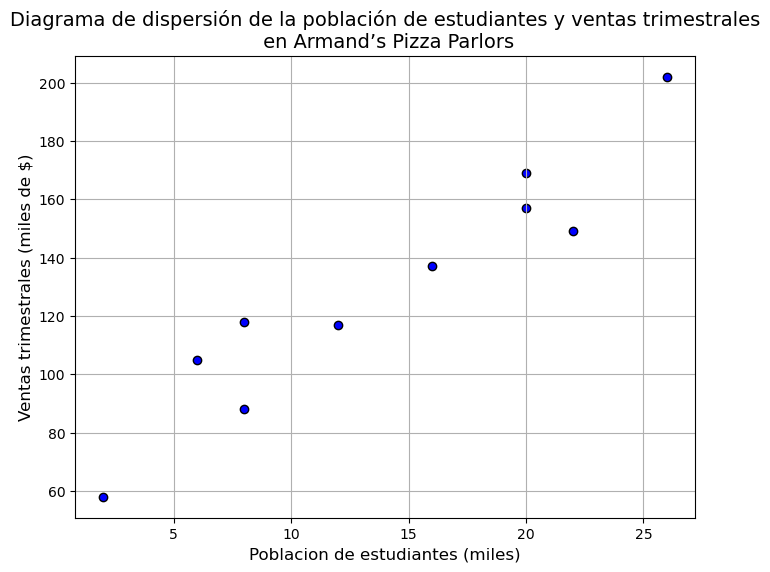

In [14]:
# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['estudiantes_miles'], df['ventas_trim_miles'], color='blue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Diagrama de dispersión de la población de estudiantes y ventas trimestrales\n en Armand’s Pizza Parlors', fontsize=14)
plt.xlabel('Poblacion de estudiantes (miles)', fontsize=12)
plt.ylabel('Ventas trimestrales (miles de $)', fontsize=12)

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Modelo lineal simple

$$\hat{y}_i = b_0 + b_1x_i$$

Donde:
* $\hat{y}_i$ = valor estimado de las ventas trimestrales (en miles de dólares) del iésimo restaurante
* $b_0$ =  intersección de la recta de regresión estimada con el eje y
* $b_1$ = pendiente de la recta de regresión estimada
* $x_i$ = tamaño de la población de estudiantes (en miles) del iésimo restaurante

Vamos a obtener el modelo

In [44]:
# 1. Preparar los datos
x = df.estudiantes_miles.values.reshape(-1, 1)  # Variable independiente (Convertir a matriz de 2D)
y = df.ventas_trim_miles  # Variable dependiente

# 2. Crear el modelo de regresión lineal
modelo = LinearRegression()

# 3. Ajustar el modelo a los datos
modelo.fit(x, y)

# 4. Obtener el coeficiente y la intersección
b1 = modelo.coef_[0]  # Coeficiente de la regresión
b0 = modelo.intercept_  # Intersección (ordenada al origen)

print(f'Pendiente (b1): {b1}')
print(f'Intersepto (b0): {b0}')

Pendiente (b1): 5.0
Intersepto (b0): 60.0


A continuación se muestra la comparación del modelo contra los datos reales

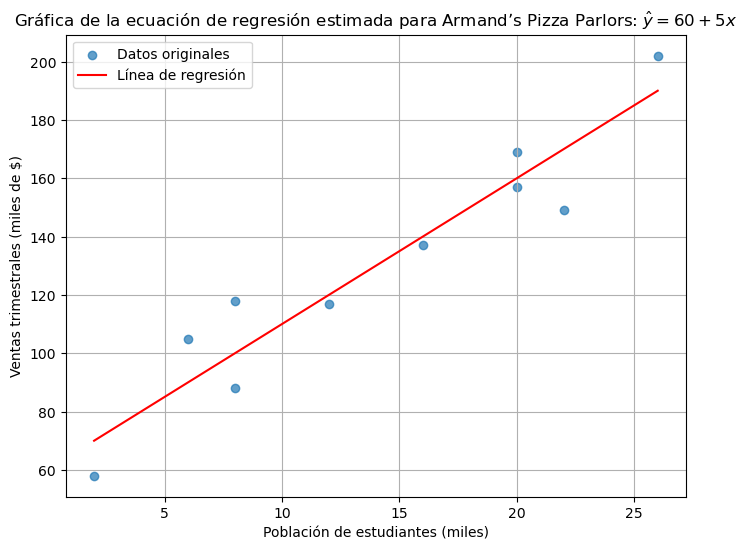

In [45]:
# 1. Predecir los valores de y para graficar la línea de regresión
y_pred = modelo.predict(x)

# 2. Graficar el diagrama de dispersión y la línea de regresión
plt.figure(figsize=(8, 6))

# 2.1. Diagrama de dispersión
plt.scatter(x, y, alpha=0.7, label='Datos originales')

# 2.2. Línea de regresión
plt.plot(x, y_pred, color='red', label='Línea de regresión')

# 2.3. Añadir etiquetas y título
plt.title('Gráfica de la ecuación de regresión estimada para Armand’s Pizza Parlors: $\hat{y}=60 + 5x$')
plt.xlabel('Población de estudiantes (miles)')
plt.ylabel('Ventas trimestrales (miles de $)')
plt.legend()
plt.grid(True)

# 2.4. Mostrar

### Solución

Sea **$X_i$** la VA relacionada con el promedio obtenido en la prueba de lectura critica por el i-esimo colegio 

A partir de la tabla podemos obtener los siguientes valores:

Se tienen las siguientes VA:
* Sea **$X_i$** la VA relacionada con el promedio obtenido en la prueba de matematicas por el i-esimo colegio privado
* Sea **$Y_i$** la VA relacionada con el promedio obtenido en la prueba de matematicas por el j-esimo colegio publico

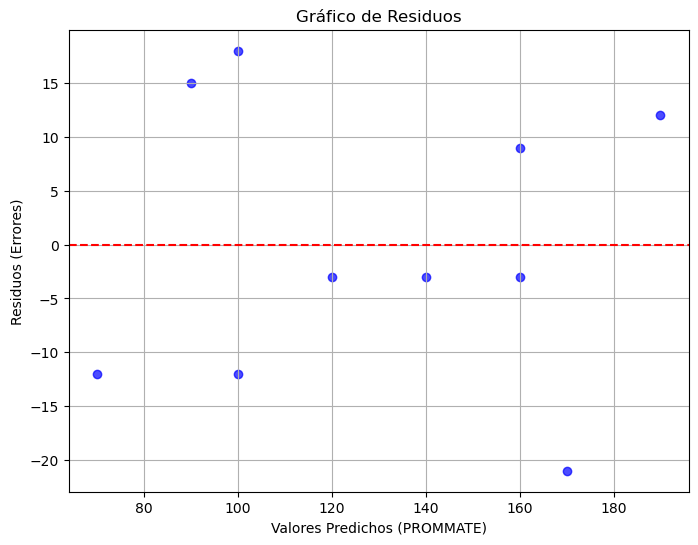

In [46]:
# 1. Calcular los residuos (errores)
residuos = y - y_pred

# 2. Graficar los residuos (errores) en función de los valores predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.7, color='blue')

# 2.1. Dibujar una línea horizontal en y=0 para visualizar los errores
plt.axhline(0, color='red', linestyle='--')

# 2.2. Añadir etiquetas y título
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos (PROMMATE)')
plt.ylabel('Residuos (Errores)')
plt.grid(True)

# 2.3. Mostrar el gráfico
plt.show()

### Metricas de rendimiento del modelo de regresión

#### Error absoluto medio (MAE)

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$

#### Error cuadratico medio

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### Raíz del error cuadrático medio 

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$


#### Suma de Cuadrados Residuales

$$SCR = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### Suma de Cuadrados Explicada (SCE)

$$SCE = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$$

#### Suma Total de Cuadrados

$$SCT = \sum_{i=1}^{n} (y_i - \bar{y})^2$$


#### Coeficiente de determinación

$$R^2 = \frac{SCE}{SCT} = \frac{SCE}{SCE+SCR} = 1 - \frac{SCE}{SCR}  = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$


In [73]:
df2 = pd.DataFrame({'x_i': [2,6,8,8,12,16,20,20,22,26], 'y_i': y})
df2['yp_i'] = y_pred

y_mean = df2.y_i.mean()

# Error 
def error(y_i, yp_i):
    error = y_i - yp_i
    return error

error_i = df2.apply(lambda row: error(row['y_i'], row['yp_i']),axis=1)
df2['e_i'] = error_i
df2['dp_i'] = df2.apply(lambda row: error(row['yp_i'], y_mean),axis=1)
df2['d_i'] = df2.apply(lambda row: error(row['y_i'], y_mean),axis=1)

#print(baseball_df)
df2['cuad_e_i'] = df2['e_i']**2
df2['cuad_dp_i'] = df2['dp_i']**2
df2['cuad_d_i'] = df2['d_i']**2
df2

,x_i,y_i,yp_i,e_i,dp_i,d_i,cuad_e_i,cuad_dp_i,cuad_d_i
restaurante,,,,,,,,,
1,2,58,70.0,-12.0,-60.0,-72.0,144.0,3600.0,5184.0
2,6,105,90.0,15.0,-40.0,-25.0,225.0,1600.0,625.0
3,8,88,100.0,-12.0,-30.0,-42.0,144.0,900.0,1764.0
4,8,118,100.0,18.0,-30.0,-12.0,324.0,900.0,144.0
5,12,117,120.0,-3.0,-10.0,-13.0,9.0,100.0,169.0
6,16,137,140.0,-3.0,10.0,7.0,9.0,100.0,49.0
7,20,157,160.0,-3.0,30.0,27.0,9.0,900.0,729.0
8,20,169,160.0,9.0,30.0,39.0,81.0,900.0,1521.0
9,22,149,170.0,-21.0,40.0,19.0,441.0,1600.0,361.0


In [74]:
# Calculo SCT, SCR y SCE

# SCE: Suma de cuadrados explicada
SCE = np.sum(df2.cuad_dp_i)
# SCE = np.sum((y_pred - np.mean(y)) ** 2)

# SCR: Suma de cuadrados residuales
# SCR = np.sum((y - y_pred) ** 2)
SCR = np.sum(df2.cuad_e_i)

# SCT: Suma total de cuadrados
# SCT = np.sum((y - np.mean(y)) ** 2)
SCT = np.sum(df2.cuad_d_i)
R2
R2 = 1 - (SCR / SCT)

# 2. Despliegue de las metricas
print(f"SCE: {SCE}")
print(f"SCR : {SCR}")
print(f"SCT: {SCT}")
print(f"R^2: {R2}")

SCE: 14200.0
SCR : 1530.0
SCT: 15730.0
R^2: 0.9027336300063573


In [66]:
# Calculo SCT, SCR y SCE

# SCE: Suma de cuadrados explicada
SCE = np.sum((y_pred - np.mean(y)) ** 2)

# SCR: Suma de cuadrados residuales
SCR = np.sum((y - y_pred) ** 2)

# SCT: Suma total de cuadrados
SCT = np.sum((y - np.mean(y)) ** 2)

# R2
R2 = 1 - (SCR / SCT)

# 2. Despliegue de las metricas
print(f"SCE: {SCE}")
print(f"SCR : {SCR}")
print(f"SCT: {SCT}")
print(f"R^2: {R2}")

SCE: 14200.0
SCR : 1530.0
SCT: 15730.0
R^2: 0.9027336300063573


El 90.27% de la variabilidad en las ventas se explica por la relación lineal que existe entre éstas y el tamaño de la población
de estudiantes. Sería satisfactorio encontrar un buen ajuste para la ecuación de regresión estimada.

### Coeficiente de correlacion

$$r = \frac{S_{xy}}{\sqrt{S_{xx} S_{yy}}} = r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2\sum_{i=1}^{n} (y_i - \bar{y})^2 }} $$

$$r = \left(signo\;de\;b_1\right)\sqrt{R^2} $$


In [76]:
r = np.sqrt(R2)
print(f"Coeficiente de correlación (r): {r}")


Coeficiente de correlación (r): 0.9501229552044079


Con este coeficiente $r$ es 0.9501 por lo que concluimos que existe una fuerte relación lineal positiva entre $x$ y $y$. 

### Anova

| Fuente de variación | Suma de cuadrados | Grados de libertad | Cuadrado medio | F-estadístico |
|---------------------|-------------------|--------------------|----------------|---------------|
| Regresión           | $SCR$             | $1$                | $CMR=\frac{SCR}{1}$       | $F$         |
| Residuos            | $SCE$             | $n-2$              | $CMR=\frac{SCE}{n-2}$         |               |
| Total               | $STC$             | $n-1$              |                |               |




In [77]:
# Crear un DataFrame con los datos originales para usar con statsmodels
df_anova = pd.DataFrame({
    'estudiantes_miles': df.estudiantes_miles.values,
    'ventas_trim_miles': df.ventas_trim_miles
})

# Ajustar el modelo de regresión lineal con OLS (Ordinary Least Squares)
modelo_anova = ols('ventas_trim_miles ~ estudiantes_miles', data=df_anova).fit()

# Generar la tabla ANOVA utilizando el modelo ajustado
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)

# Mostrar la tabla ANOVA
# import ace_tools as tools; tools.display_dataframe_to_user(name="Tabla ANOVA calculada", dataframe=tabla_anova)
display(tabla_anova)

,sum_sq,df,F,PR(>F)
estudiantes_miles,14200.0,1.0,74.248366,0.000025
Residual,1530.0,8.0,NaN,NaN


## Supuestos del modelo

En un análisis de regresión se empieza por hacer un supuesto acerca del modelo apropiado para la relación entre las variables dependientes e independientes. En el caso de la regresión lineal simple, se supone que el modelo de regresión es

$$y = \beta_0 + \beta_1x + \epsilon$$


Sin embargo, aun cuando se obtenga un valor grande para $R^2$, la ecuación de regresión estimada no debe ser usada sino hasta que se realice un análisis para determinar si el modelo empleado es apropiado. Un paso importante para ver si el supuesto del modelo es adecuado, consiste en probar la signifi cancia de la relación. Las pruebas de significancia en el análisis de regresión están basadas en los siguientes supuestos acerca del término del error $\epsilon$.

1. $E(\epsilon) = 0$
2. $VAR(\epsilon) = \sigma^2 = cte$
3. Los valores de $\epsilon$ con independientes (no estan correlacionados).
4. El término del error $\epsilon$ es una variable aleatoria distribuida normalmente.

### Validación de supuestos

El diagnóstico del modelo se realiza haciendo uso de los residuales:

$$e_i = y_i - \hat{y_i}$$

Se debe verificar que estos residuales cumplan:
* Independencia ("aleatoriedad")
* Normalidad 
* Varianza constante
* Linealidad

### Varianza constante

Para el caso lo que vamos a probar es lo siguiente:

**Hipótesis**:
* $\bold{H_o}$: La varianza de los residuos **es constante** en todos los colegios.


**Hipótesis**:
* $\bold{H_o}: V[\epsilon_i] = \sigma^2$ (La varianza es constante)
* $\bold{H_a}: V[\epsilon_i] \neq \sigma^2$ (La varianza no es constante)

**Regla de decisión**: Se rechaza $Ho$ si $VP < \alpha$

**Hipótesis**:
* $\bold{H_o}: V[\epsilon_i] = \sigma^2$ (La varianza es constante)
* $\bold{H_a}: V[\epsilon_i] \neq \sigma^2$ (La varianza no es constante)

**Regla de decisión**: Se rechaza $Ho$ si $VP < \alpha$

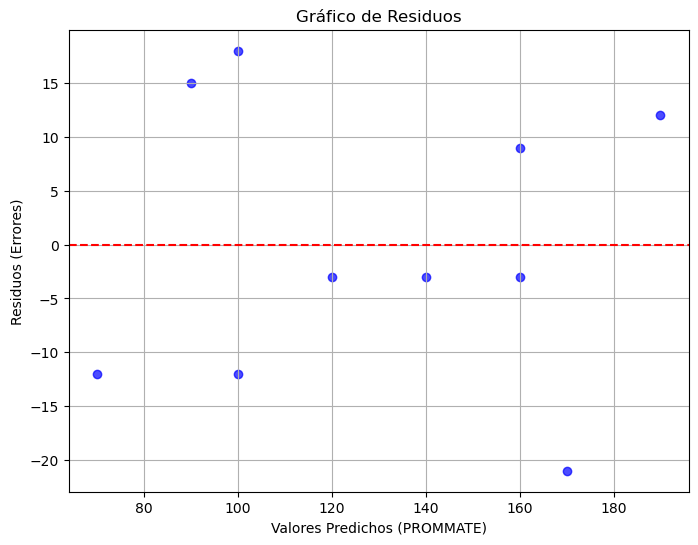

In [78]:
# 1. Calcular los residuos (errores)
residuos = y - y_pred

# 2. Graficar los residuos (errores) en función de los valores predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.7, color='blue')

# 2.1. Dibujar una línea horizontal en y=0 para visualizar los errores
plt.axhline(0, color='red', linestyle='--')

# 2.2. Añadir etiquetas y título
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos (PROMMATE)')
plt.ylabel('Residuos (Errores)')
plt.grid(True)

# 2.3. Mostrar el gráfico
plt.show()

In [84]:
# Realizar el test de Bartlett
x_list = [2,6,8,8,12,16,20,20,22,26]
stat, p_value = bartlett(x_list, residuos)

# Mostrar el resultado
print(f'Estadístico de Bartlett: {stat}')
print(f'Valor p: {p_value}')

Estadístico de Bartlett: 2.012558260892837
Valor p: 0.15600206401595007


Dado que el valor p es mayor que el nivel de significancia de 0.05, **no se rechaza la hipótesis nula**. Esto sugiere que las varianzas de los residuos son homogéneas (hay homocedasticidad), es decir, los errores tienen varianza constante.

In [93]:
# Obtener el valor ajustado (predicciones) y residuos para el test de Breusch-Pagan
x_with_const = sm.add_constant(df['estudiantes_miles'])
x_with_const


,const,estudiantes_miles
restaurante,,
1,1.0,2
2,1.0,6
3,1.0,8
4,1.0,8
5,1.0,12
6,1.0,16
7,1.0,20
8,1.0,20
9,1.0,22


In [96]:
# Realizar el test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, x_with_const)

# El test devuelve 4 valores: estadístico de Lagrange Multiplier, p-valor, estadístico f y p-valor f
bp_stat, bp_p_value, _, _ = bp_test

# Mostrar los resultados
print(f'Estadístico de White: {bp_stat}')
print(f'Valor p: {bp_p_value}')

Estadístico de White: 0.02774968550356416
Valor p: 0.8676986677175519


Dado que el valor p es mayor que 0.05, no se rechaza la hipótesis nula. Esto indica que no hay evidencia suficiente para concluir que los errores presentan heterocedasticidad, lo que sugiere que los errores tienen varianza constante (homocedasticidad) en esta distribución.

### Normalidad

In [87]:
# Realizar la prueba de Shapiro-Wilk para los residuos
shapiro_stat, shapiro_p_value = shapiro(residuos)
shapiro_stat, shapiro_p_value

(0.937588632106781, 0.5265070199966431)

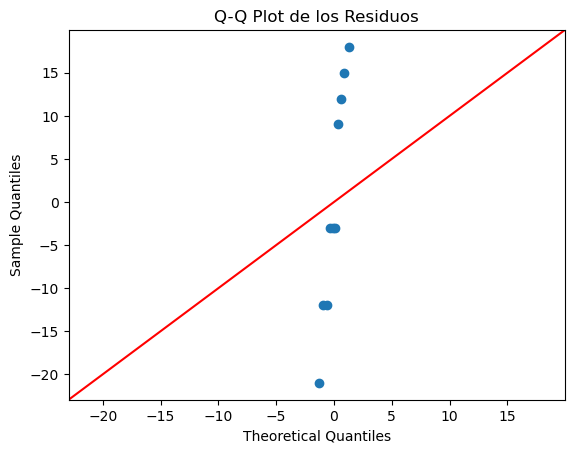

In [88]:
# Generar el Q-Q plot para visualizar la normalidad de los residuos
sm.qqplot(residuos, line ='45')
plt.title('Q-Q Plot de los Residuos')
plt.show()

Dado que el valor p es mayor que 0.05, no se rechaza la hipótesis nula de que los residuos se distribuyen normalmente. Esto significa que no hay evidencia suficiente para concluir que los residuos no siguen una distribución normal.

Además, el Q-Q plot muestra visualmente que los residuos están alineados con la línea diagonal, lo que sugiere que los errores tienen una distribución aproximadamente normal.

### Aleatoriedad

In [99]:
dw_stat = durbin_watson(residuos)

dw_stat

3.223529411764706

El valor del estadístico de Durbin-Watson para los residuos de este modelo es aproximadamente 3.22.

Interpretación:
* Un valor cercano a 2 indica que no hay autocorrelación en los errores (los errores son aleatorios).
* Un valor cercano a 0 indicaría autocorrelación positiva.
* Un valor cercano a 4 indicaría autocorrelación negativa.

Dado que el valor obtenido es cercano a 4, esto sugiere que podría haber autocorrelación negativa en los errores. Esto significa que, en general, un error positivo tiende a ser seguido por un error negativo, y viceversa, lo que indica que los errores no son completamente aleatorios.

Si deseas más análisis o alguna otra prueba, estaré encantado de ayudarte. ​

### Estandarizar los residuales

$$MCE = \frac{SCE}{n - 2} = \frac{1}{n-2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Fórmula para estandarizar los residuos:

Los residuos estandarizados se calculan utilizando la siguiente fórmula:

$$d_i = \frac{e_i}{s_e} = \frac{e_i}{\sqrt{MCE}}$$

Donde:
* $d_i$: es el residuo estandarizado para la observación 
* $e_i$: es el residuo ordinario para la observación $i$ (diferencia entre el valor observado y el valor predicho).
* $s_e$: es la desviación estándar de los residuos.

In [101]:
# Calcular la desviación estándar de los residuos
se = np.std(residuos, ddof=2)

# Estandarizar los residuos
residuos_estandarizados = residuos / se

# Mostrar los residuos estandarizados
print(residuos_estandarizados)

restaurante
1    -0.867722
2     1.084652
3    -0.867722
4     1.301583
5    -0.216930
6    -0.216930
7    -0.216930
8     0.650791
9    -1.518513
10    0.867722
Name: ventas_trim_miles, dtype: float64


Sin embargo, aun cuando se obtenga un valor grande para $R^2$, la ecuación de regresión estimada no debe ser usada sino hasta que se realice un análisis para determinar si el modelo empleado es apropiado. Un paso importante para ver si el supuesto del modelo es adecuado, consiste en probar la signifi cancia de la relación. Las pruebas de significancia en el análisis de regresión están basadas en los siguientes supuestos acerca del término del error $\epsilon$.


$$s^2 = ECM = \frac{SCE}{n - 2} = \frac{1}{n-2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

* https://github.com/OpenIntroStat/openintro-statistics-slides
* https://365datascience.com/calculators/confidence-interval-calculator/
* https://oercommons.org/authoring/18167-openstax-introductory-statistics-videos-with-lectu/view
* https://stanford.edu/~shervine/teaching/cme-106/
* https://datatab.es/tutorial/confidence-interval
* https://neuraldatascience.io/3b-ai_assisted/multi_data_files_2.html
* https://stanford.edu/~shervine/teaching/cme-106/cheatsheet-statistics#confidence-intervals